In [1]:
import pandas as pd  # Per la gestione dei dati
import matplotlib.pyplot as plt  # Per creare grafici
import seaborn as sns  # Per migliorare la visualizzazione grafica



### Caricamento dei dati
In questa sezione,  carico il dataset `HollywoodMovies.csv` utilizzando Pandas e visualizzo le prime righe per comprendere la struttura dei dati. Il dataset contiene informazioni sui film, tra cui il budget, gli incassi al botteghino, il genere, ecc.


In [2]:

df = pd.read_csv("HollywoodMovies.csv")  # Caricamento del dataset in un DataFrame


In [3]:
df.head()  # Mostra le prime 5 righe del dataset

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.1,35540.0,336.53,554.34,890.87,258.0,345.30,58.57,2007
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,4122.0,121.6,29507.0,322.72,476.24,798.96,160.0,499.35,76.00,2007
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,4011.0,70.5,17577.0,319.25,390.46,709.71,150.0,473.14,47.00,2007
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.7,26302.0,309.42,654.00,963.42,300.0,321.14,38.23,2007
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,4285.0,77.1,17998.0,292.00,647.88,939.89,150.0,626.59,51.40,2007


## Esplorazione del dataset  
Prima di procedere con le analisi, verifico la struttura e le informazioni principali dei dati.


In [4]:
# Mostra informazioni sulle colonne (tipi di dati, valori mancanti, ecc.)
df.info()

# Controlla la presenza di valori nulli
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Movie             970 non-null    object 
 1   LeadStudio        961 non-null    object 
 2   RottenTomatoes    913 non-null    float64
 3   AudienceScore     907 non-null    float64
 4   Story             641 non-null    object 
 5   Genre             691 non-null    object 
 6   TheatersOpenWeek  949 non-null    float64
 7   OpeningWeekend    969 non-null    float64
 8   BOAvgOpenWeekend  945 non-null    float64
 9   DomesticGross     970 non-null    float64
 10  ForeignGross      876 non-null    float64
 11  WorldGross        914 non-null    float64
 12  Budget            897 non-null    float64
 13  Profitability     896 non-null    float64
 14  OpenProfit        895 non-null    float64
 15  Year              970 non-null    int64  
dtypes: float64(11), int64(1), object(4)
memory u

Movie                 0
LeadStudio            9
RottenTomatoes       57
AudienceScore        63
Story               329
Genre               279
TheatersOpenWeek     21
OpeningWeekend        1
BOAvgOpenWeekend     25
DomesticGross         0
ForeignGross         94
WorldGross           56
Budget               73
Profitability        74
OpenProfit           75
Year                  0
dtype: int64

### Numero di film rilasciati per anno
In questa analisi, è stato  calcolato il numero di film rilasciati per ogni anno. Per fare ciò, si utilizza la colonna **Year** del dataset, che rappresenta l'anno di uscita di ciascun film, e si contano il numero di film per ciascun anno.

Il grafico a barre mostra il numero di film rilasciati ogni anno, evidenziando le tendenze nel tempo. Le barre più alte indicano gli anni con un maggior numero di film rilasciati, mentre le barre più basse indicano gli anni con meno film. L'asse delle ascisse rappresenta gli anni, mentre l'asse delle ordinate mostra il numero di film rilasciati in ciascun anno.



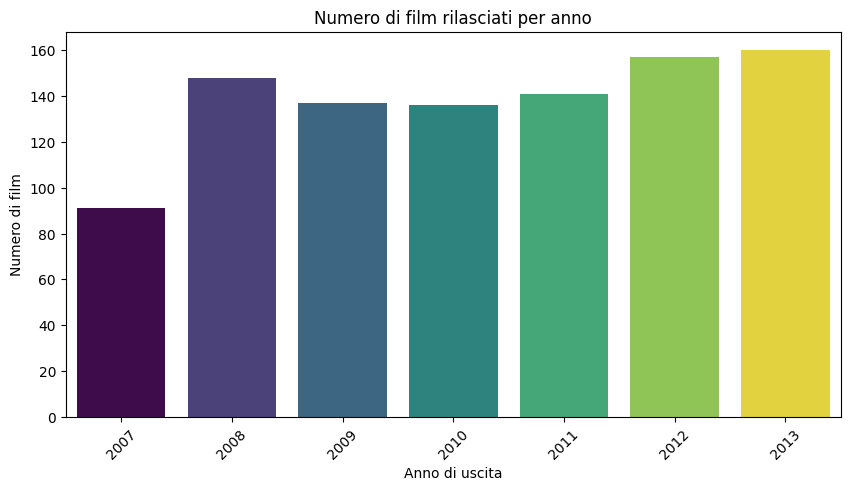

In [26]:
# Conta i film per anno
movies_per_year = df["Year"].value_counts().sort_index()

# Crea il grafico a barre
plt.figure(figsize=(10,5))  
sns.barplot(x=movies_per_year.index, y=movies_per_year.values, hue=movies_per_year.index, palette="viridis", legend=False) 

# Aggiunge etichette
plt.xlabel("Anno di uscita")
plt.ylabel("Numero di film")
plt.title("Numero di film rilasciati per anno")
plt.xticks(rotation=45)
plt.show()


### Distribuzione percentuale dei film per genere
In questa analisi, è stato calcolato il numero di film per ciascun genere presente nel dataset. Utilizzando la funzione `value_counts()`, si ottiene il conteggio dei film suddivisi per genere.

Il grafico a torta mostra la percentuale di film per ciascun genere, evidenziando quale genere è più rappresentato nel dataset rispetto agli altri. Le etichette sulla torta indicano i generi, mentre le percentuali mostrano la distribuzione relativa di ciascun genere all'interno del totale dei film.


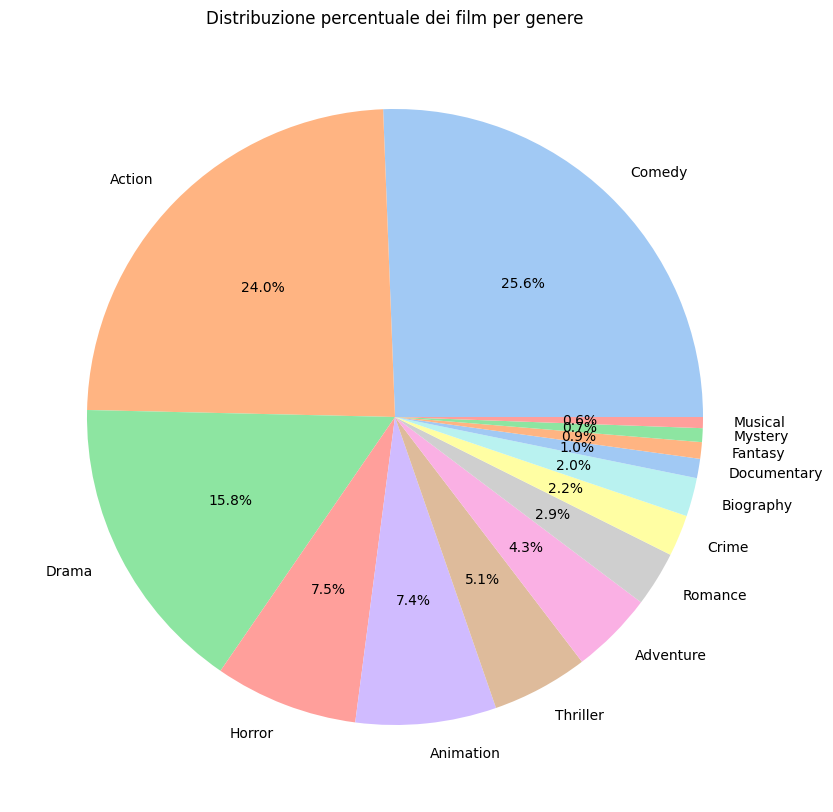

In [28]:
# Conta il numero di film per genere
movies_per_genre = df["Genre"].value_counts()

# Crea il grafico a torta
plt.figure(figsize=(10,10))
plt.pie(movies_per_genre, labels=movies_per_genre.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))

# Aggiunge un titolo
plt.title("Distribuzione percentuale dei film per genere")


# Mostra il grafico
plt.show()



### Relazione tra Budget e WorldGross
In questa analisi, è stato creato un grafico a dispersione (scatter plot) per esplorare la relazione tra il **Budget** dei film e i loro **Incassi WorldGross**. L'asse **x** rappresenta il **Budget** del film, espresso in milioni di dollari, mentre l'asse **y** mostra gli **Incassi WorldGross**, ossia il totale degli incassi a livello globale.

Il grafico consente di osservare come il budget di un film possa essere correlato agli incassi mondiali, permettendo di identificare eventuali tendenze o anomalie.


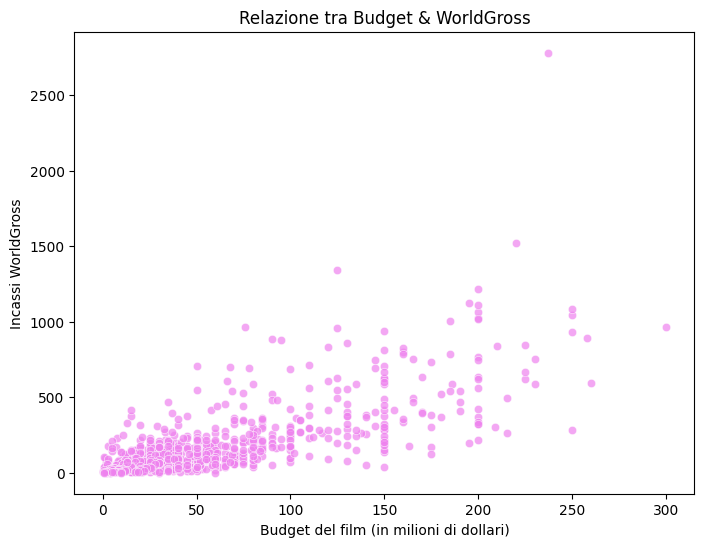

In [13]:
# Crea il grafico
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Budget"], y=df["WorldGross"], alpha=0.7, color="violet")

# Aggiunge etichette e titolo
plt.xlabel("Budget del film (in milioni di dollari)")
plt.ylabel("Incassi WorldGross")
plt.title("Relazione tra Budget & WorldGross")

plt.show()


### Distribuzione del Budget dei Film
In questa analisi, ho esaminato la distribuzione del **Budget** dei film nel dataset utilizzando un **istogramma** con una **curva di densità (KDE)**. L'istogramma mostra come i budget dei film siano distribuiti tra i diversi valori, mentre la curva di densità aiuta a visualizzare la distribuzione continua dei dati.

Nel grafico, l'asse delle **x** rappresenta il budget dei film in milioni di dollari, mentre l'asse delle **y** indica la frequenza, ovvero quante volte i film si trovano in ciascun intervallo di budget. Questo grafico ci permette di osservare la concentrazione dei film in determinate fasce di budget e di identificare eventuali tendenze o anomalie.


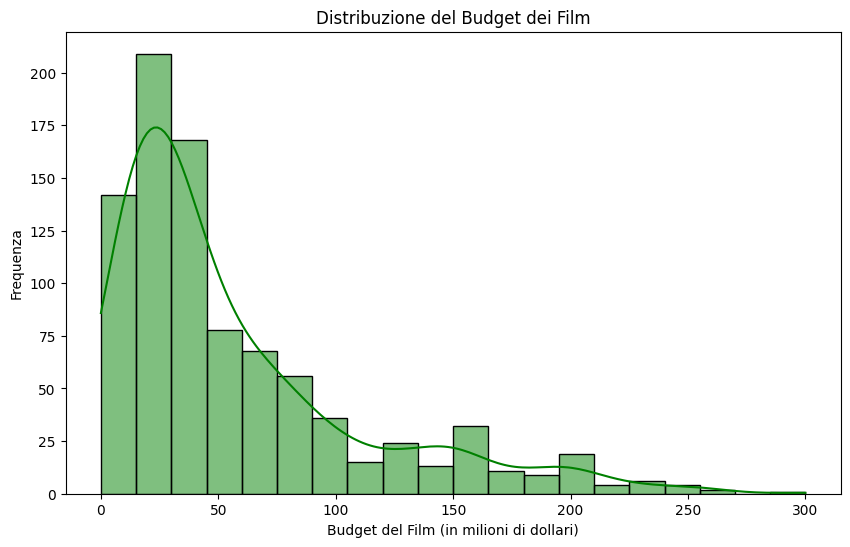

In [20]:
# Crea il grafico a distribuzione del budget
plt.figure(figsize=(10, 6))
sns.histplot(df['Budget'], bins=20, kde=True, color='green')

# Aggiunge etichette e titolo
plt.xlabel("Budget del Film (in milioni di dollari)")
plt.ylabel("Frequenza")
plt.title("Distribuzione del Budget dei Film")
plt.show()


### Media degli Incassi Mondiali per Anno
In questa analisi, ho calcolato la **media degli incassi mondiali** per anno. Per fare ciò, ho raggruppato i dati per anno e calcolato la media del campo **WorldGross** (incassi mondiali) per ciascun anno.

Il grafico a linee mostra come gli incassi medi mondiali siano cambiati nel corso degli anni, evidenziando eventuali tendenze, aumenti o diminuzioni significative. La linea rappresenta l'andamento degli incassi mondiali medi anno per anno, fornendo una visione delle performance finanziarie globali del settore cinematografico nel tempo.



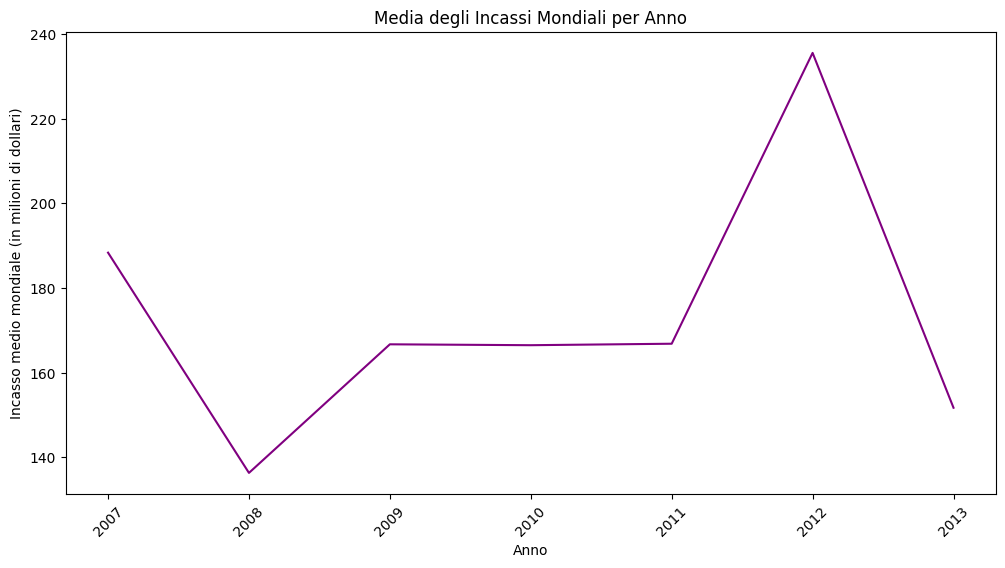

In [22]:


# Calcola la media degli incassi mondiali per anno
incassi_mondiali_annuali = df.groupby('Year')['WorldGross'].mean()

# Crea il grafico a linee
plt.figure(figsize=(12, 6))
sns.lineplot(x=incassi_mondiali_annuali.index, y=incassi_mondiali_annuali.values, color='purple')

# Aggiung etichette e titolo
plt.xlabel("Anno")
plt.ylabel("Incasso medio mondiale (in milioni di dollari)")
plt.title("Media degli Incassi Mondiali per Anno")
plt.xticks(rotation=45)
plt.show()


### Percentuale di film con un punteggio positivo su AudienceScore (Punteggio > 60%)
In questa analisi, ho creato una variabile che indica se il punteggio di **AudienceScore** di un film è superiore al 60%. Successivamente, calcola la distribuzione dei film che soddisfano questa condizione (ovvero, quelli con un punteggio superiore al 60%) e quelli che non lo fanno.

Il grafico a torta mostra **True**: I film con un AudienceScore superiore al 60%. Questi sono i film che hanno ricevuto una valutazione positiva da parte del pubblico.
**False**: I film con un AudienceScore inferiore o uguale al 60%. Questi sono i film che hanno ricevuto una valutazione meno favorevole da parte del pubblico.


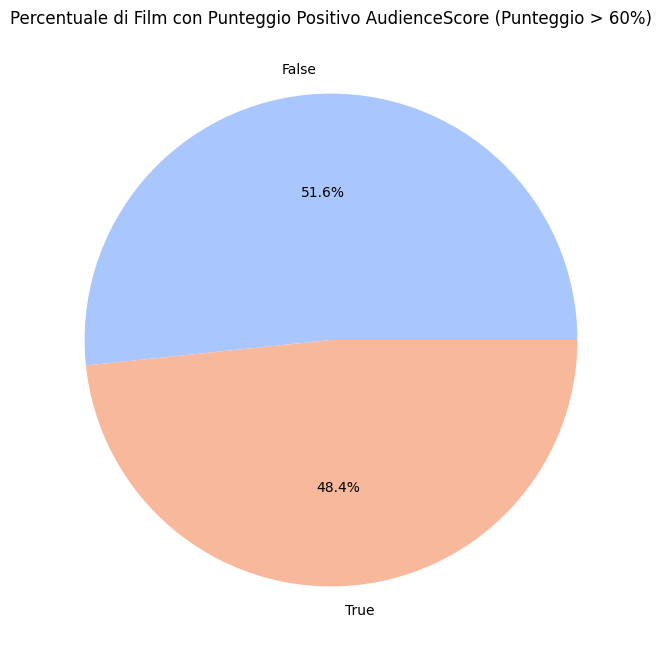

In [25]:
# Creo una variabile che rappresenta se il punteggio di AudienceScore è superiore al 60%
df['AudienceScoreSuccess'] = df['AudienceScore'] > 60

# Calcola la distribuzione dei film con successo (AudienceScore > 60)
successo_audience = df['AudienceScoreSuccess'].value_counts()

# Crea il grafico a torta
plt.figure(figsize=(8, 8))
successo_audience.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(successo_audience)))

# Aggiung titolo
plt.title("Percentuale di Film con Punteggio Positivo AudienceScore (Punteggio > 60%)")
plt.ylabel("")
plt.show()
